In [1]:
# 30 pts for projects

<b>(a) (10 pts.) At the root node for a decision tree in this domain, what are the information gains associated with the Outlook and Humidity attributes? (Use a threshold of 75 for humidity (i.e., assume a binary split:
humidity ≤ 75 / humidity > 75). Be sure to show your computations.</b>



In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
#first ways
# data = {
#     'Outlook': ['sunny', 'sunny','sunny','sunny','sunny', 
#                 'Overcast', 'Overcast', 'Overcast', 'Overcast',
#                 'Rain', 'Rain', 'Rain', 'Rain','Rain'],
    
# 'Temp(F)':[75,80,85,72,69,72,83,64,81,71,65,75,68,70],
    
# 'Humidity (%)': [70, 90, 85, 95, 70, 90, 78, 65, 75, 80, 70, 80, 80,96],
    
# 'Windy?':['true','true','false','false','false','true','false',
#           'true','false','true','true','false','false','false'],
    
# 'Class': ['Play', 'Don’t Play','Don’t Play', 'Don’t Play', 'Play', 'Play',
#           'Play', 'Play','Play', 'Don’t Play', 'Don’t Play', 'Play', 'Play', 
#           'Play']
# }


In [4]:
# second way
df1=pd.read_csv('game.csv')
df = pd.DataFrame(df1)
df

,Outlook,Temp(F),Humidity (%),Windy?,Class
0,sunny,75,70,True,Play
1,sunny,80,90,True,Don't Play
2,sunny,85,85,False,Don't Play
3,sunny,72,95,False,Don't Play
4,sunny,69,70,False,Play
5,Overcast,72,90,True,Play
6,Overcast,83,78,False,Play
7,Overcast,64,65,True,Play
8,Overcast,81,75,False,Play
9,Rain,71,80,True,Don't Play


<h3>what is an entropy?</h3>
entropy helps us understand the amount of unpredictability or impurity in a dataset.<br>
<p>
<p>Entropy=−(p 
Play
​
 log 
2
​
 (p 
Play
​
 )+p 
Don’t Play
​
 log 
2
​
 (p 
Don’t Play
​
 ))</p>

<p><b>We have 14 samples: 9 "Play" and 5 "Don’t Play".</b><br>
The probabilities for each class are <br>
𝑝
(
Play
)
=
9/
14
p(Play)= 
14/
9
​<br>
  and 
𝑝
(
Don’t Play
)
=
5/
14
p(Don’t Play)= 
14/
5
​
 .</p>
 

<b><p>H(Root)=−( 
9/
14 log 
    <sub>2</sub> 9/14 + 5/14 log<sub>2</sub> 5/14)</p></b>

In [5]:
# Function to calculate entropy
def entropy(counts):
    total = sum(counts)
    return -sum((count / total) * math.log2(count / total) 
    for count in counts if count > 0)
    print(counts)

In [6]:
# Calculate root entropy (before any split)
root_counts = df['Class'].value_counts()
root_entropy = entropy(root_counts)
print(root_entropy)

1.2870540281187268


In [7]:
# Calculate information gain for Outlook
outlook_groups = df.groupby('Outlook')['Class'].value_counts()
print(outlook_groups)
outlook_entropy = sum(
    (count / len(df)) * entropy(df[df['Outlook'] == outlook]['Class'].value_counts())
    for outlook, count in df['Outlook'].value_counts().items()
)
info_gain_outlook = root_entropy - outlook_entropy
print(info_gain_outlook)

Outlook   Class      
Overcast  Play           4
Rain      Play           3
          Don't Play     2
sunny     Don't  Play    2
          Play           2
          Don't Play     1
Name: count, dtype: int64
0.39674021049657304


In [8]:
# Calculate information gain for Humidity (threshold of 75)
low_humidity = df[df['Humidity (%)'] <= 75]
print(low_humidity)
high_humidity = df[df['Humidity (%)'] > 75]
print(high_humidity)
low_entropy = entropy(low_humidity['Class'].value_counts())
high_entropy = entropy(high_humidity['Class'].value_counts())
humidity_entropy = (len(low_humidity) / len(df)) * low_entropy + (len(high_humidity) / len(df)) * high_entropy
info_gain_humidity = root_entropy - humidity_entropy
print(info_gain_humidity)


     Outlook  Temp(F)  Humidity (%)  Windy?       Class
0      sunny       75            70    True        Play
4      sunny       69            70   False        Play
7   Overcast       64            65    True        Play
8   Overcast       81            75   False        Play
10      Rain       65            70    True  Don't Play
     Outlook  Temp(F)  Humidity (%)  Windy?        Class
1      sunny       80            90    True   Don't Play
2      sunny       85            85   False  Don't  Play
3      sunny       72            95   False  Don't  Play
5   Overcast       72            90    True         Play
6   Overcast       83            78   False         Play
9       Rain       71            80    True   Don't Play
11      Rain       75            80   False         Play
12      Rain       68            80   False         Play
13      Rain       70            96   False         Play
0.10638795576295434


In [9]:
# Print results
print("Information Gain for Outlook:", info_gain_outlook)
print("Information Gain for Humidity (threshold 75):", info_gain_humidity)


Information Gain for Outlook: 0.39674021049657304
Information Gain for Humidity (threshold 75): 0.10638795576295434


<b>(b) (10 pts.) Again at the root node, what are the gain ratios associated with the Outlook and Humidity attributes (using the same threshold as in (a))? Be sure to show your computations.</b>

In [10]:
# Function to calculate split information
def split_information(subset_sizes, total_size):
    return -sum((size / total_size) * math.log2(size / total_size) for size in subset_sizes if size > 0)

# Split information for Outlook
outlook_counts = df['Outlook'].value_counts()
outlook_split_info = split_information(outlook_counts, len(df))
print("Split Information for Outlook:", outlook_split_info)

Split Information for Outlook: 1.5774062828523454


In [11]:
# Split information for Humidity (threshold 75)
low_humidity_count = len(df[df['Humidity (%)'] <= 75])
high_humidity_count = len(df[df['Humidity (%)'] > 75])
humidity_split_info = split_information([low_humidity_count, high_humidity_count], len(df))
print("Split Information for Humidity (threshold 75):", humidity_split_info)


Split Information for Humidity (threshold 75): 0.9402859586706311


In [12]:
# Gain Ratio for Outlook
gain_ratio_outlook = info_gain_outlook / outlook_split_info \
if outlook_split_info != 0 else 0
print("Gain Ratio for Outlook:", gain_ratio_outlook)

# Gain Ratio for Humidity
gain_ratio_humidity = info_gain_humidity / humidity_split_info \
if humidity_split_info != 0 else 0
print("Gain Ratio for Humidity (threshold 75):", gain_ratio_humidity)

Gain Ratio for Outlook: 0.2515142831681686
Gain Ratio for Humidity (threshold 75): 0.11314425657633428


<b>c)(10 pts.) Draw the complete (unpruned) decision tree, showing the information gain at each non-leaf node, and class predictions at the leaves</b>

In [13]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoder = LabelEncoder()
df['Outlook'] = label_encoder.fit_transform(df['Outlook'])
df['Class'] = label_encoder.fit_transform(df['Class'])  # 'Play' becomes 1, 'Don’t Play' becomes 0

# Separate features and target
X = df[['Outlook', 'Humidity (%)']]
y = df['Class']

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree classifier
tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=0)
tree_clf.fit(X, y)


DecisionTreeClassifier(criterion='entropy', random_state=0)

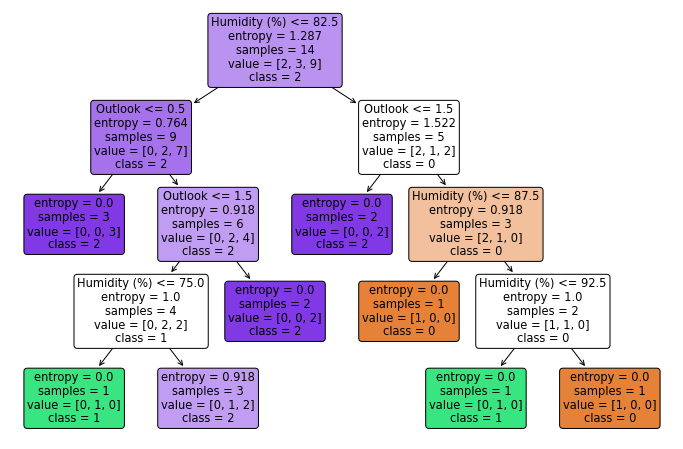

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, 
          feature_names=['Outlook', 'Humidity (%)'],  # Adjust this if needed
          class_names=tree_clf.classes_.astype(str),  # Ensure this matches model classes
          filled=True, 
          impurity=True, 
          rounded=True)
plt.show()
